<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Supervised Learning Foundations</center></font>
<center><font size=6>Linear Regression Extended - Week 2</center></font>

<center><img src="https://cdn.pixabay.com/photo/2017/04/25/05/14/samurai-2258604_960_720.jpg" width="720"></center>

<center><font size=6>Anime Ratings Case Study</font></center>

## Problem Statement

### Business Context

Streaming media services facilitate on-demand or real-time presentation and distribution of audio, video, and multimedia content across a communications route without downloading the files to their systems. This saves users time and storage, and at the same time provides the media owners with built-in copy protection. In today's digital space, streaming has become an influential medium for accessing information. Improved connectivity and advancement in technology have made streaming services accessible to almost everyone having an internet connection, and the surging demand for on-demand entertainment services such as entertainment programs and live matches is boosting the adoption of streaming media services globally.

Streamist is a streaming company that streams web series and movies to a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.


### Objective

Streamist is currently focusing on the anime available in their portal and wants to identify the most important factors involved in rating an anime.  As a data scientist at Streamist, you are tasked with analyzing the  portal's anime data and identifying the important factors by building a predictive model to predict the rating of an anime.



### Data Dictionary

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

1. title: title of the anime
2. mediaType: format of publication
3. eps: number of episodes (movies are considered 1 episode)
4. duration: duration of an episode in minutes
5. startYr: the year that airing started
6. finishYr: the year that airing finished
7. description: the synopsis of the plot
8. contentWarn: content warning
9. watched: number of users that completed it
10. watching: number of users that are watching it
11. rating: average user rating
12. votes: number of votes that contribute to the rating
13. studio_primary: studios responsible for creation
14. studios_colab: whether there was a collaboration between studios for anime production
15. genre: genre to which the anime belongs

## Installing  and Importing Necessary Libraries


In [1]:
# Installing the libraries with the specified version.
!pip install pandas==2.0.3 numpy==1.25.2 seaborn==0.13.1 matplotlib==3.7.1 scikit-learn==1.2.2 statsmodels==0.14.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel / runtime and run all cells after this note sequentially.*

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [3]:
# uncomment and run the following lines for mounting Google Drive to the notebook (to be used only if executing in Google Colab)
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
data = pd.read_csv("anime_ratings_data.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows of the dataset

In [5]:
data.head()

,title,mediaType,eps,duration,startYr,finishYr,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,2015,2015,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Kuripuri*Kuripura,Movie,1,5.0,2008,2008,NaN,No,10,0,2.120,10.0,Others,No,Other
2,GJ-bu@,TV Special,1,46.0,2014,2014,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,1984,1984,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama
4,Miru Tights Special,DVD Special,1,4.0,2019,2019,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other


* The dataset contains information about different anime
* Many anime seem to have a single episode only, which are movies
* Description seems to be missing for some anime

### Checking the shape of the dataset

In [6]:
data.shape

(6523, 15)

* The dataset contains information (15 attributes) about 6523 anime

### Checking the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523 entries, 0 to 6522
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           6523 non-null   object 
 1   mediaType       6496 non-null   object 
 2   eps             6523 non-null   int64  
 3   duration        6248 non-null   float64
 4   startYr         6523 non-null   int64  
 5   finishYr        6523 non-null   int64  
 6   description     4114 non-null   object 
 7   contentWarn     6523 non-null   object 
 8   watched         6523 non-null   int64  
 9   watching        6523 non-null   int64  
 10  rating          6523 non-null   float64
 11  votes           6496 non-null   float64
 12  studio_primary  6523 non-null   object 
 13  studios_colab   6523 non-null   object 
 14  genre           6523 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 764.5+ KB


* There are 8 numeric (*float* and *int* type) and 7 string (*object* type) columns in the data
* The target variable is the rating of an anime, which is of *float* type

### Statistical summary of the dataset

In [8]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,6523,6523,Dragon Ball Z Movie 15: Resurrection 'F',1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,6496,8,TV,2145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,6523.0,NaN,NaN,NaN,8.716235,11.002479,1.0,1.0,1.0,12.0,34.0
duration,6248.0,NaN,NaN,NaN,18.396287,20.94935,1.0,5.0,7.0,25.0,67.0
startYr,6523.0,NaN,NaN,NaN,2005.241147,12.911035,1967.0,2000.0,2010.0,2015.0,2020.0
finishYr,6523.0,NaN,NaN,NaN,2005.575349,12.568169,1970.0,2000.0,2010.0,2015.0,2020.0
description,4114,4081,"In 19th century Belgium, in the Flanders count...",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,6523,2,No,5825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
watched,6523.0,NaN,NaN,NaN,1347.948643,1737.138112,5.0,56.0,349.0,2252.5,4649.0
watching,6523.0,NaN,NaN,NaN,57.445654,76.527405,0.0,2.0,13.0,98.0,199.0


* We can see that the anime ratings vary between 1.1 and 4.7, which suggests that the anime were rated on a scale of 0-5
* The general rating of anime is 2.96
* *TV* is the most occurring type of media.
* The number of views for the anime in the data varies from 5 to ~5000
* The number of votes received by an anime in the data varies from 10 to 3100

### Checking for duplicate values

In [9]:
data.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [10]:
data.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

* There are missing values in many columns.

In [11]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [12]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

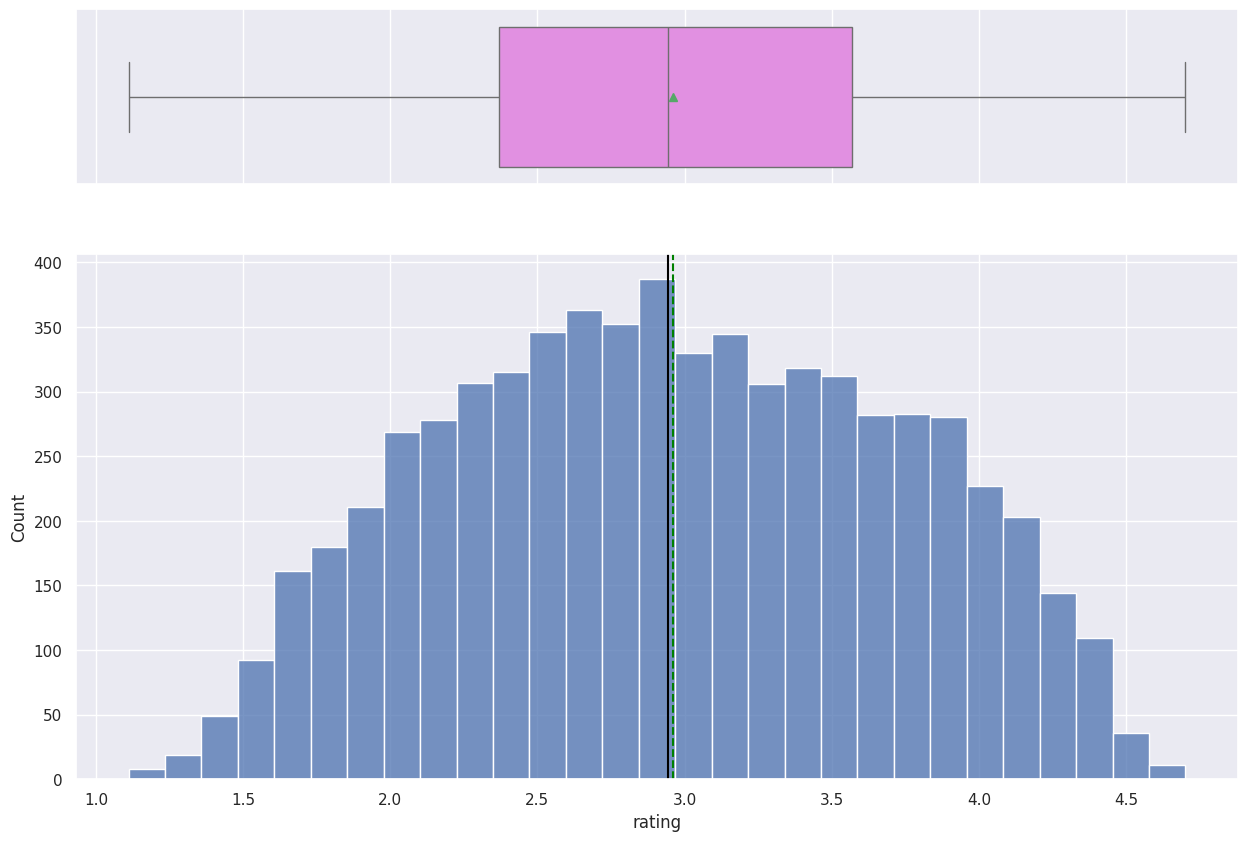

In [14]:
histogram_boxplot(df, "rating")

* The anime ratings are close to normally distributed with fatter tails
* Anime are rated approximately 3 by viewers on average

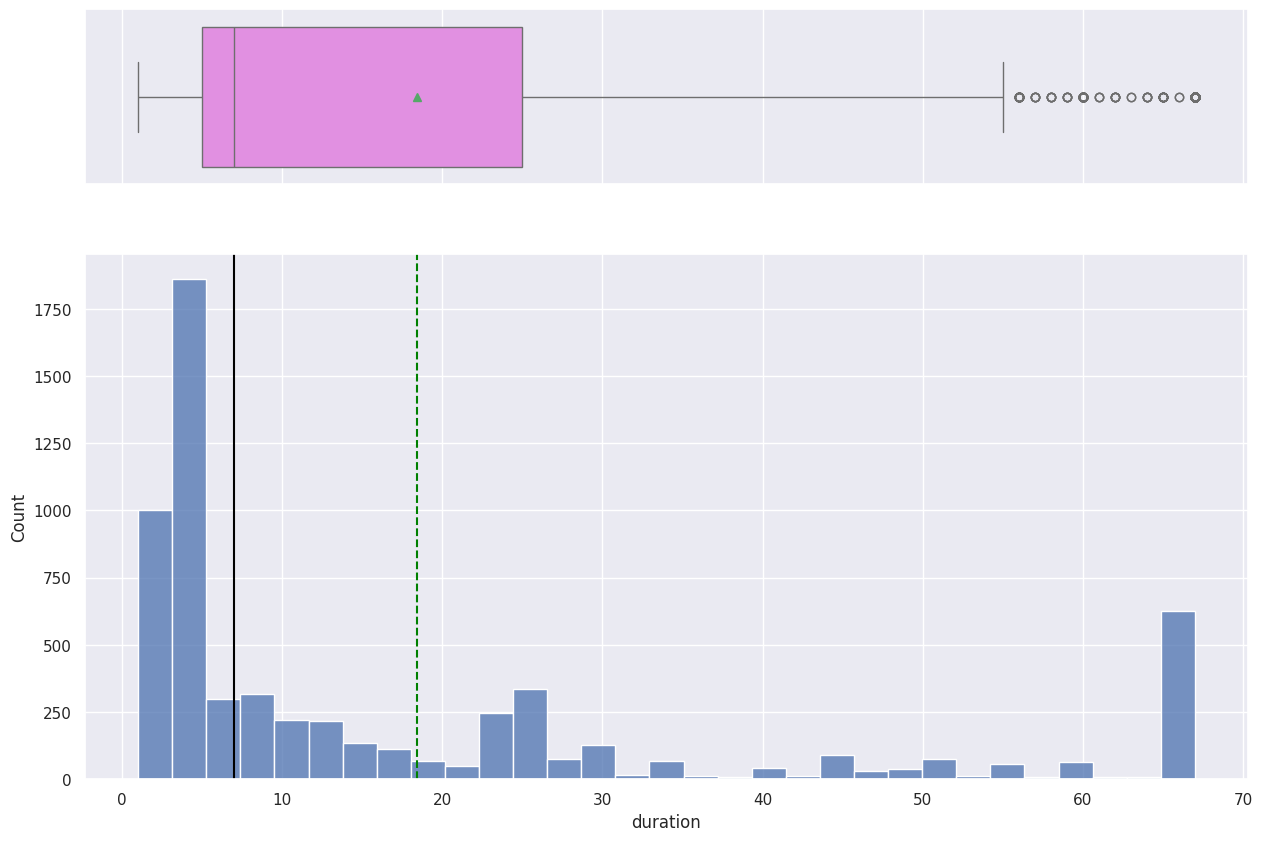

In [15]:
histogram_boxplot(df, "duration")

* The distribution for duration column is right-skewed with a median runtime of less than 10 minutes
* There are a few anime with episodes having 1 hour or more runtime, and are likely to be movies




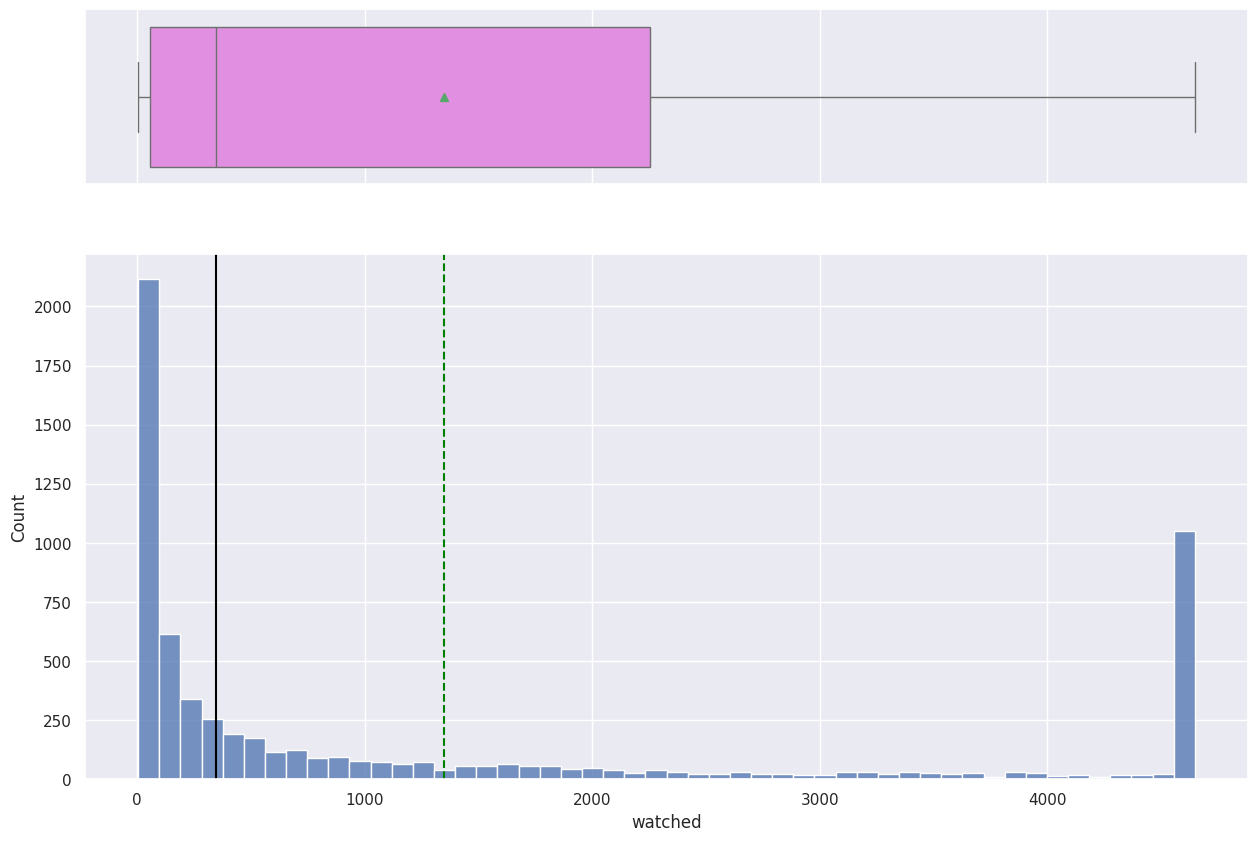

In [16]:
histogram_boxplot(df, "watched", bins=50)

* The distribution for watched is heavily right-skewed, and most of the anime having less than 500 viewers
* There is a spike at ~4500 in the histogram, indicating that there are anime which have been viewed by a lot of users

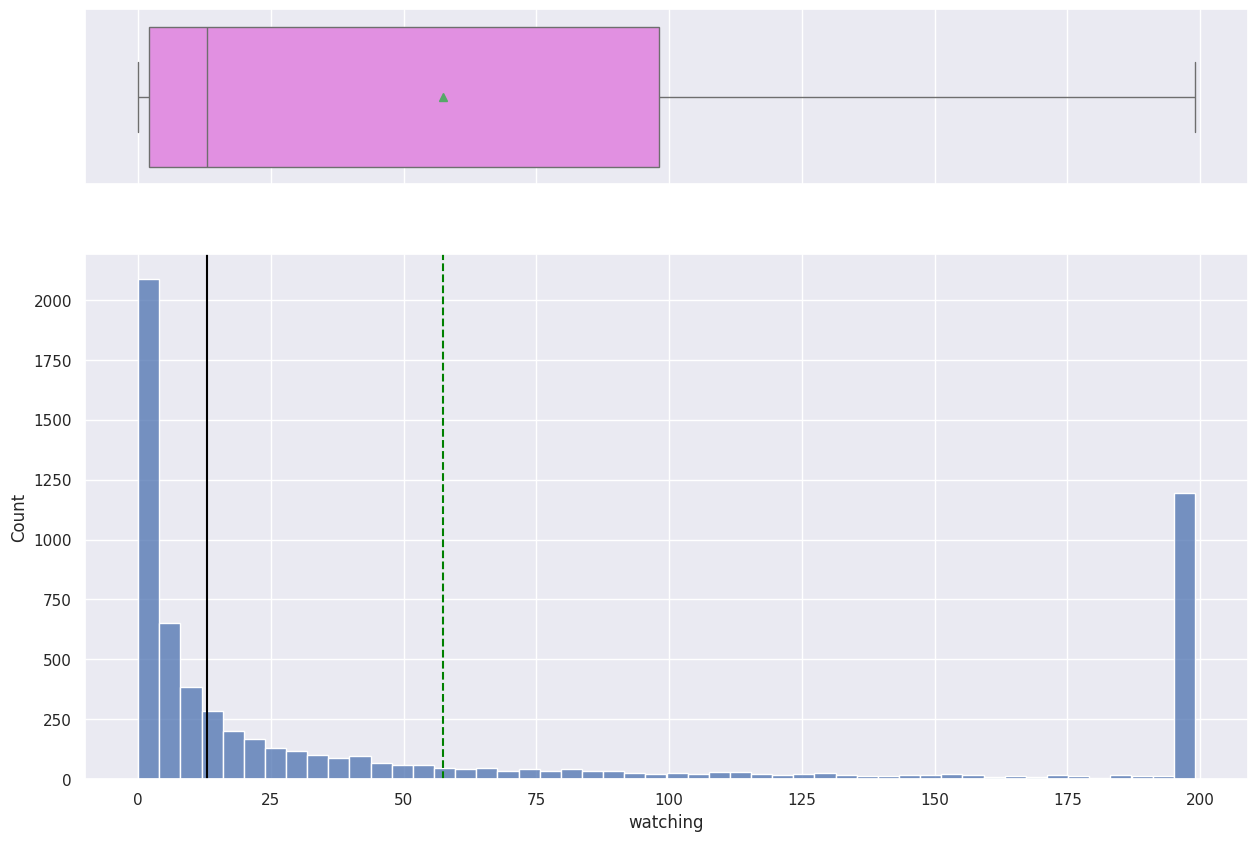

In [17]:
histogram_boxplot(df, "watching", bins=50)

* The distribution for `watching` is heavily right-skewed, and most of the anime have less than 50 current viewers
* There is a spike at ~200 in the histogram, indicating that there are anime which are being viewed by a lot of users

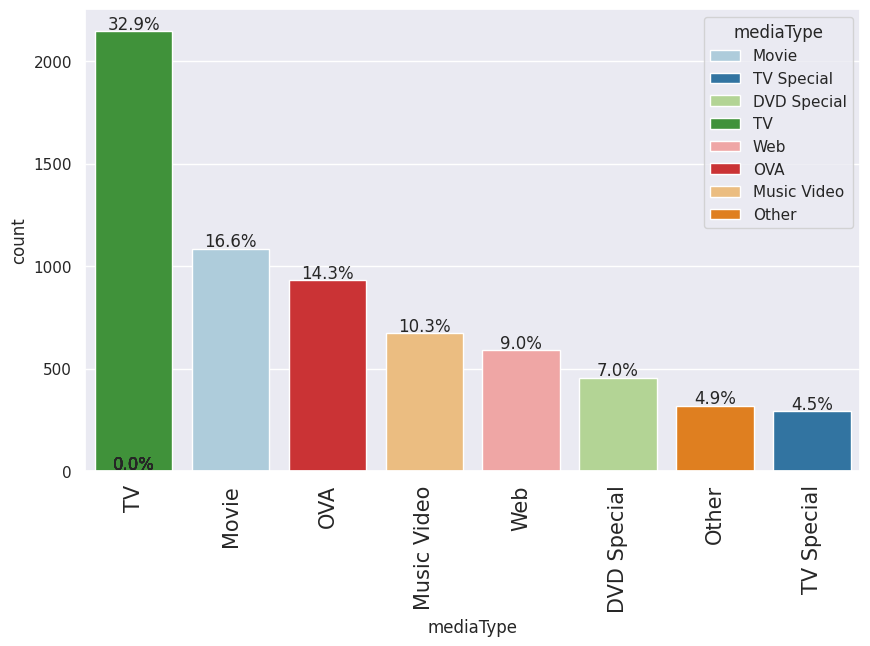

In [18]:
labeled_barplot(df, "mediaType", perc=True)

* Approximately one-third of the anime have been released for TV
* 9% of the anime have been released as web series, which is a little surprising

In [19]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("startYr")
num_cols.remove("finishYr")

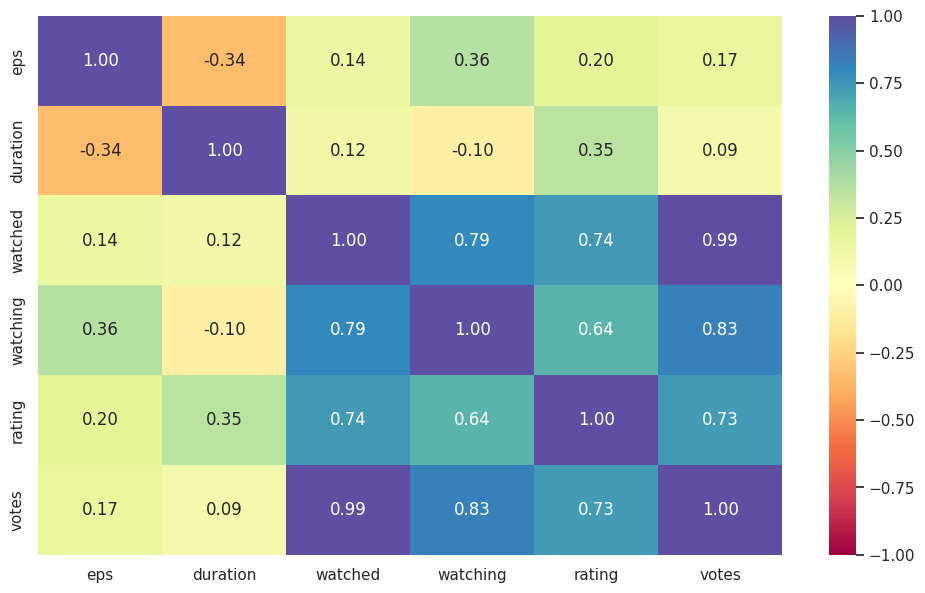

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The rating of an anime is highly correlated with the number of people who have watched the anime and voted for it on the portal
* The number of people who have watched the anime is highly correlated with the number of people who are watching the anime
* The number of people who have watched the anime is very highly correlated with the number of people who have voted for the anime on the portal

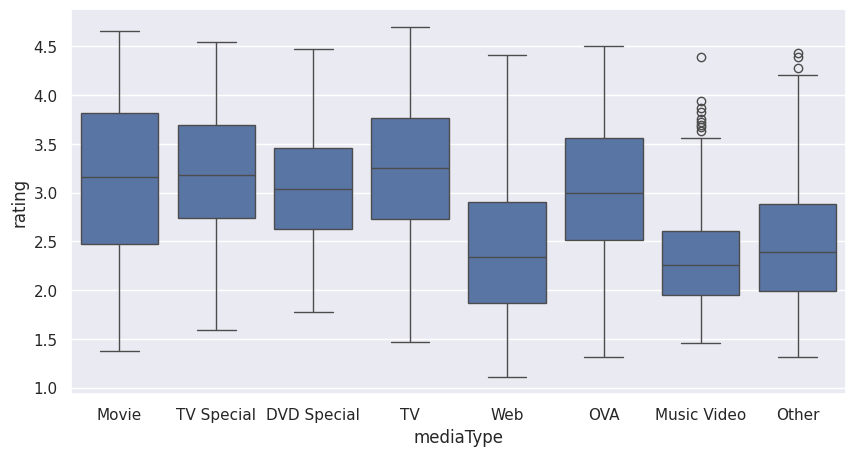

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="rating")
plt.show()

* Anime available as web series or music videos have a lower rating in general

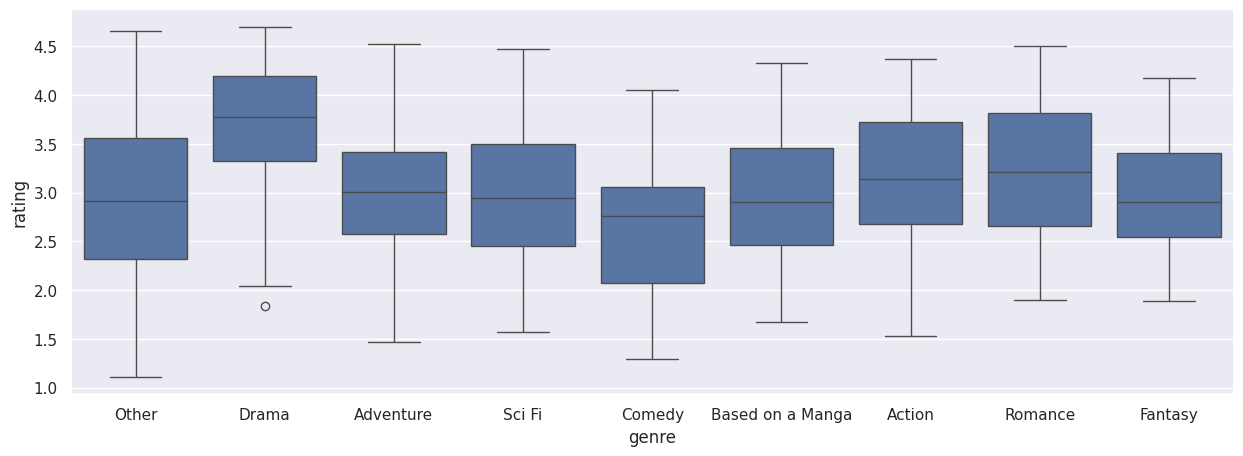

In [22]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="rating")
plt.show()

* Anime under the genre of Drama are rated the highest in general, while those under the genre of Comedy and rated the least

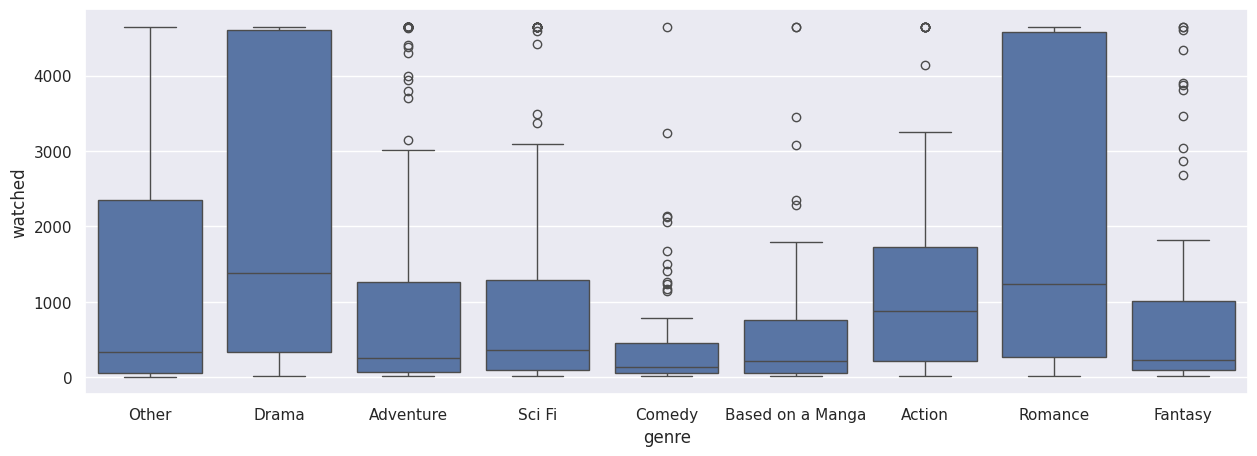

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="watched")
plt.show()

* Anime under the genres of Drama and Romance have higher viewership in general

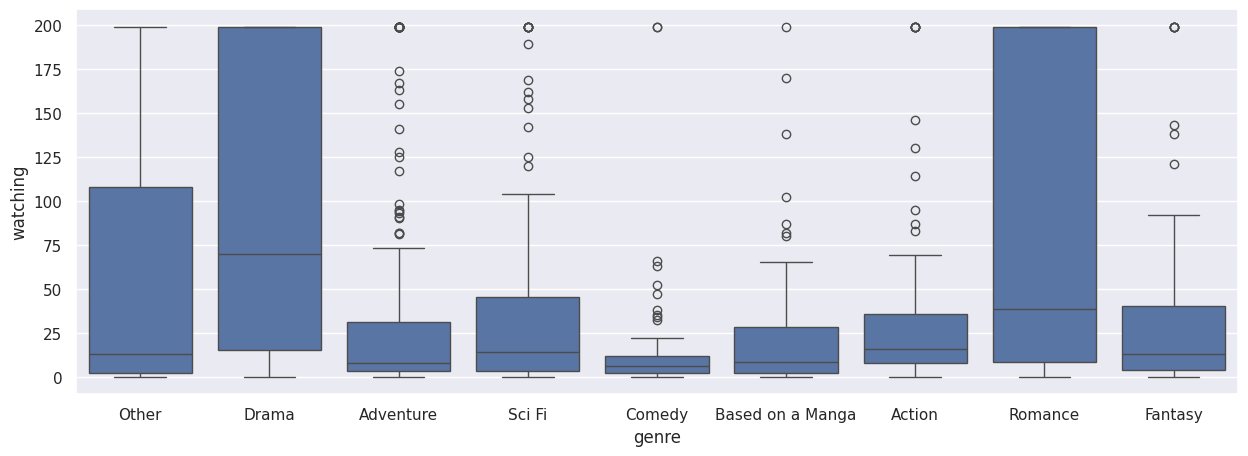

In [24]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="watching")
plt.show()

* Anime from the Drama and Romance genres are being watched more in general

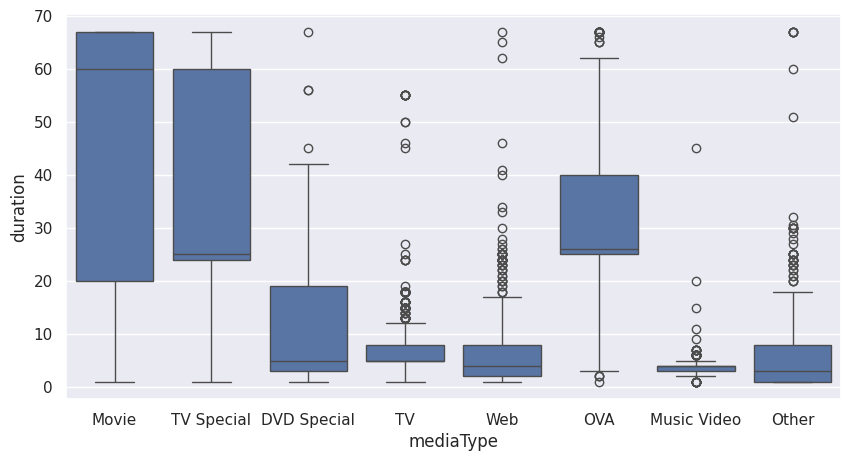

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="duration")
plt.show()

* Anime released as movies or TV speicals have the highest duration while music videos have the lowest, which is expected

## Data Preprocessing

### Missing Value Treatment

In [26]:
df.isnull().sum()

title                0
mediaType           27
eps                  0
duration           275
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes               27
studio_primary       0
studios_colab        0
genre                0
dtype: int64

Let's fix the missing values in the data.

- For the variable `mediaType`, we will impute the missing values with '*Other*' as the exact values for that category are not known
- For the variables `duration` and `votes`, we will impute the missing values in each column with the median grouped by `genre` and `mediaType` as both the columns have skewed distributions

In [27]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy()

In [28]:
df1.mediaType.fillna("Other", inplace=True)

In [29]:
df1["duration"] = df1["duration"].fillna(
    value=df1.groupby(["genre", "mediaType"])["duration"].transform("median")
)
df1["votes"] = df1["votes"].fillna(
    value=df1.groupby(["genre", "mediaType"])["votes"].transform("median")
)

df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             8
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

* We will impute the remaining missing values in the `duration` column with the median grouped by `genre`

In [30]:
df1["duration"] = df1["duration"].fillna(
    value=df1.groupby(["genre"])["duration"].transform("median")
)

df1.isnull().sum()

title                0
mediaType            0
eps                  0
duration             0
startYr              0
finishYr             0
description       2409
contentWarn          0
watched              0
watching             0
rating               0
votes                0
studio_primary       0
studios_colab        0
genre                0
dtype: int64

- All the missing values have been treated.

### Feature Engineering

* Let's create a new feature `years_running` by taking the difference between `finishYr` and `startYr` columns
* We will drop the original columns once the new feature is created as the year values themselves are not numerical in nature

In [31]:
df1["years_running"] = df1["finishYr"] - df1["startYr"]
df1.drop(["startYr", "finishYr"], axis=1, inplace=True)
df1.head()

,title,mediaType,eps,duration,description,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Dragon Ball Z Movie 15: Resurrection 'F',Movie,1,67.0,Even the complete obliteration of his physical...,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Kuripuri*Kuripura,Movie,1,5.0,NaN,No,10,0,2.120,10.0,Others,No,Other,0
2,GJ-bu@,TV Special,1,46.0,The story is set during the spring vacation im...,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Nausicaa of the Valley of the Wind,Movie,1,67.0,One thousand years after the Giant Warriors ca...,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,Miru Tights Special,DVD Special,1,4.0,Yua is asked to model an illustrator's designs...,No,346,8,2.494,234.0,Others,No,Other,0


### Outlier Detection

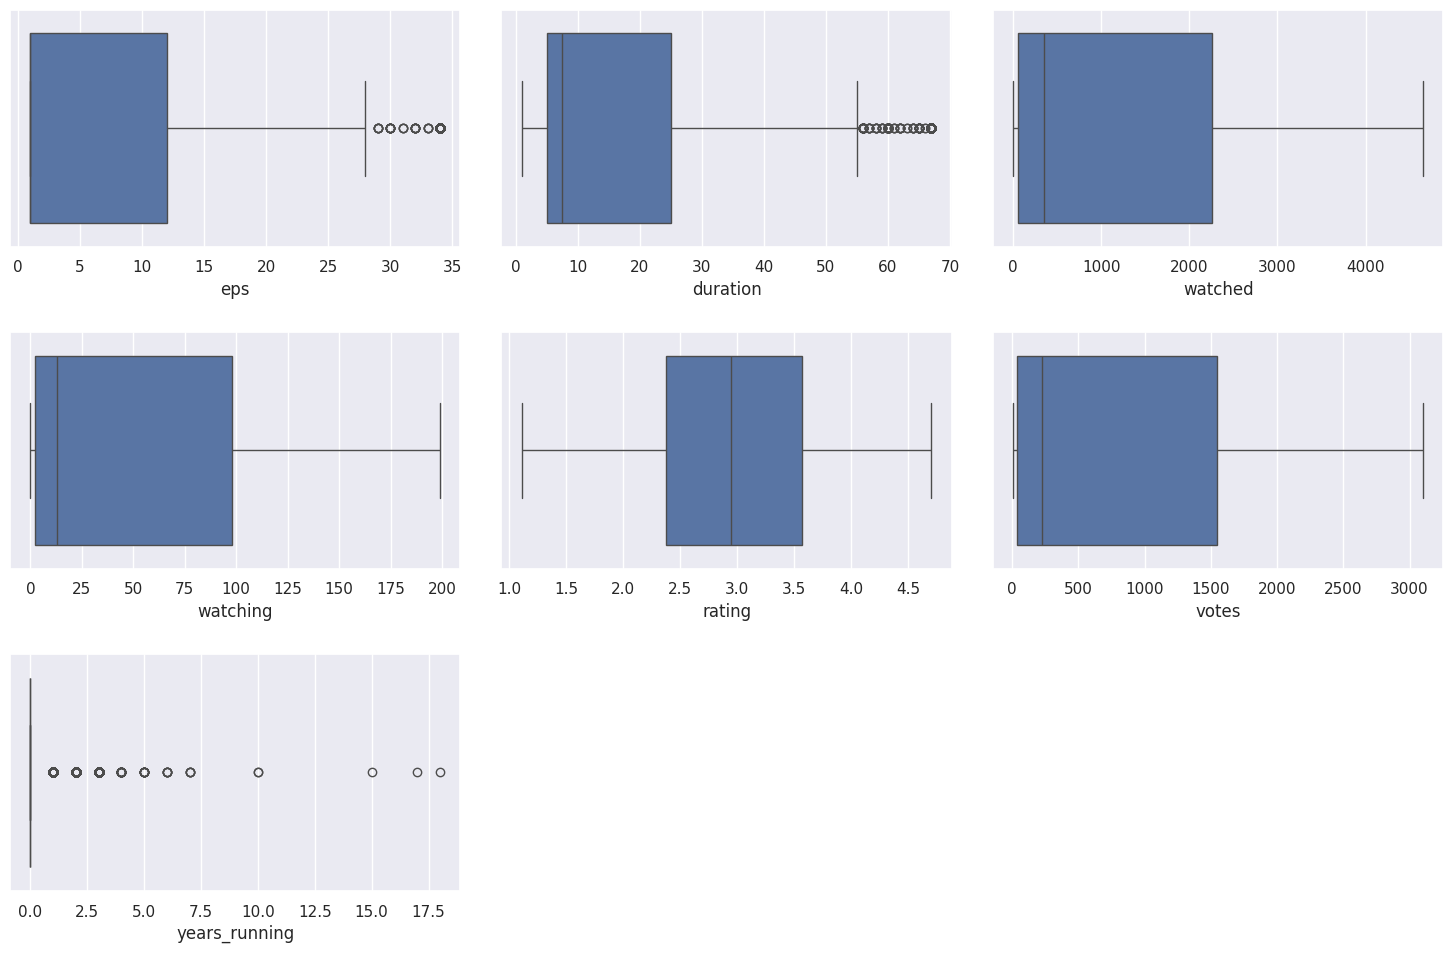

In [32]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values
- We will drop the columns `title` and `description` as they contain a lot of text and too many unique values, and can be excluded from modeling

In [33]:
df1.drop(["title", "description"], axis=1, inplace=True)
df1.head()

,mediaType,eps,duration,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre,years_running
0,Movie,1,67.0,No,4649,86,3.979,3100.0,Toei Animation,No,Other,0
1,Movie,1,5.0,No,10,0,2.120,10.0,Others,No,Other,0
2,TV Special,1,46.0,No,1630,16,3.758,1103.0,Others,No,Other,0
3,Movie,1,67.0,No,4649,184,4.444,3100.0,Others,No,Drama,0
4,DVD Special,1,4.0,No,346,8,2.494,234.0,Others,No,Other,0


### Data Preparation for Modeling

- We want to predict the rating of an anime
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [34]:
# defining X and y variables
X = df1.drop(["rating"], axis=1)
y = df1["rating"]

print(X.head())
print(y.head())

     mediaType  eps  duration contentWarn  watched  watching   votes  \
0        Movie    1      67.0          No     4649        86  3100.0   
1        Movie    1       5.0          No       10         0    10.0   
2   TV Special    1      46.0          No     1630        16  1103.0   
3        Movie    1      67.0          No     4649       184  3100.0   
4  DVD Special    1       4.0          No      346         8   234.0   

   studio_primary studios_colab  genre  years_running  
0  Toei Animation            No  Other              0  
1          Others            No  Other              0  
2          Others            No  Other              0  
3          Others            No  Drama              0  
4          Others            No  Other              0  
0    3.979
1    2.120
2    3.758
3    4.444
4    2.494
Name: rating, dtype: float64


In [35]:
# let's add the intercept to data
X = sm.add_constant(X)

In [36]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)
X.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1,67.0,4649,86,3100.0,0,True,False,False,...,True,False,False,False,False,False,False,True,False,False
1,1.0,1,5.0,10,0,10.0,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,1,46.0,1630,16,1103.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,1.0,1,67.0,4649,184,3100.0,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,1,4.0,346,8,234.0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [37]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,eps,duration,watched,watching,votes,years_running,mediaType_Movie,mediaType_Music Video,mediaType_OVA,...,studio_primary_Toei Animation,studios_colab_Yes,genre_Adventure,genre_Based on a Manga,genre_Comedy,genre_Drama,genre_Fantasy,genre_Other,genre_Romance,genre_Sci Fi
0,1.0,1.0,67.0,4649.0,86.0,3100.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,5.0,10.0,0.0,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,46.0,1630.0,16.0,1103.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,67.0,4649.0,184.0,3100.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,4.0,346.0,8.0,234.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4566
Number of rows in test data = 1957


## Model Building - Linear Regression

In [40]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     357.4
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:39:51   Log-Likelihood:                -2307.9
No. Observations:                4566   AIC:                             4684.
Df Residuals:                    4532   BIC:                             4902.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.722**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **2.7707**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `duration` is **0.0123**.

### Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [41]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [42]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40112,0.330417,0.722387,0.720304,12.444742


In [43]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.413096,0.340426,0.703053,0.6978,12.56679


**Observations**

- The training $R^2$ is 0.72, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.34 on the test data

- MAPE of 12.6 on the test data means that we are able to predict within 12.6% of the anime ratings

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [45]:
checking_vif(x_train)

,feature,VIF
0,const,152.488126
1,eps,3.907746
2,duration,2.752909
3,watched,68.407244
4,watching,4.997799
5,votes,79.580182
6,years_running,1.272615
7,mediaType_Movie,4.062291
8,mediaType_Music Video,2.409153
9,mediaType_OVA,3.049100


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [46]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [47]:
col_list = ["watched", "votes"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,votes,0.716994,0.405042
1,watched,0.707967,0.411451


In [48]:
col_to_drop = "votes"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  votes


,feature,VIF
0,const,152.249342
1,eps,3.873093
2,duration,2.752030
3,watched,3.235392
4,watching,4.154724
5,years_running,1.272523
6,mediaType_Movie,4.060078
7,mediaType_Music Video,2.408173
8,mediaType_OVA,3.049085
9,mediaType_Other,1.729382


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [49]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     362.4
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:39:54   Log-Likelihood:                -2335.7
No. Observations:                4566   AIC:                             4737.
Df Residuals:                    4533   BIC:                             4950.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Interpreting the Regression Results:

4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

- We can see that adj. R-squared has dropped from 0.720 to 0.717, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [50]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'eps', 'duration', 'watched', 'watching', 'years_running', 'mediaType_Movie', 'mediaType_Music Video', 'mediaType_OVA', 'mediaType_Other', 'mediaType_TV', 'mediaType_TV Special', 'mediaType_Web', 'contentWarn_Yes', 'studio_primary_J.C. Staff', 'studio_primary_MADHOUSE', 'studio_primary_OLM', 'studio_primary_Others', 'studio_primary_Studio Deen', 'studio_primary_Studio Pierrot', 'studio_primary_Sunrise', 'studio_primary_Toei Animation', 'genre_Adventure', 'genre_Comedy', 'genre_Drama']


In [51]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [52]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     482.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:39:55   Log-Likelihood:                -2340.4
No. Observations:                4566   AIC:                             4731.
Df Residuals:                    4541   BIC:                             4891.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [53]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40399,0.33291,0.7184,0.71685,12.536378


In [54]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.414583,0.341345,0.700912,0.697039,12.615935


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.717, i.e., our model is able to explain ~72% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.717
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [55]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
5432,2.872,2.795321,0.076679
5326,2.766,2.275887,0.490113
1021,4.049,4.446845,-0.397845
836,3.153,3.176604,-0.023604
1396,2.167,2.265921,-0.098921


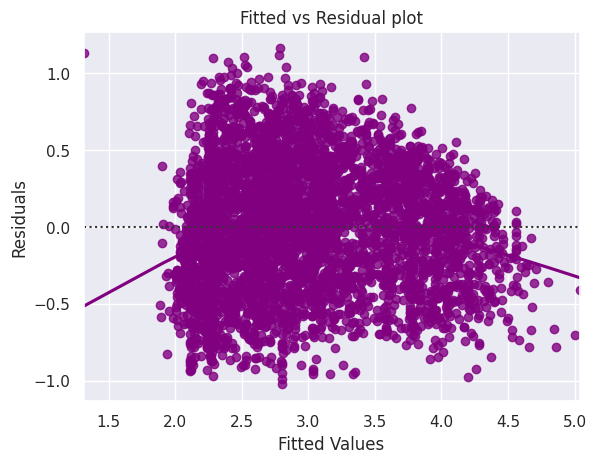

In [56]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

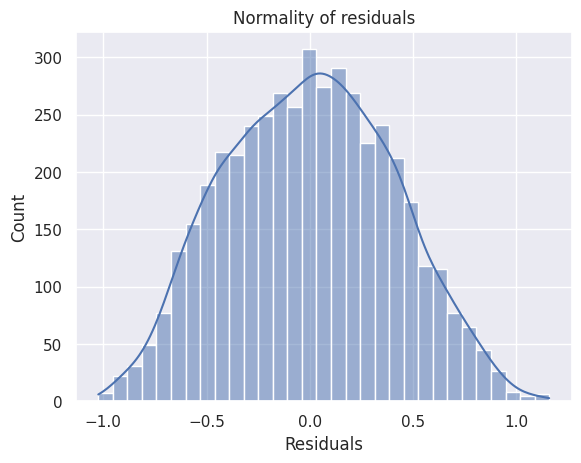

In [57]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

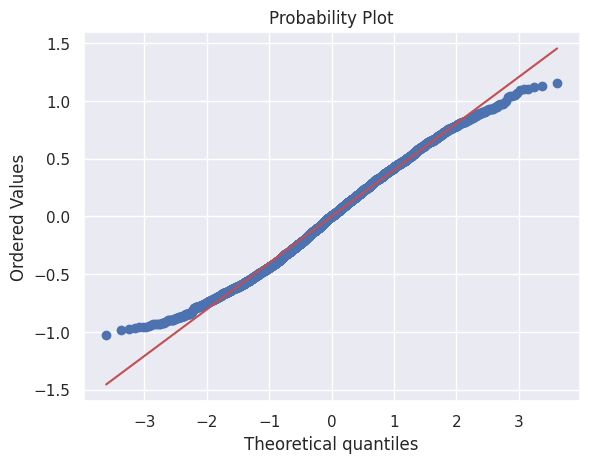

In [58]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [59]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9934884905815125, pvalue=1.4591795924768364e-13)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [60]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.048458241344956), ('p-value', 0.130479678454497)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [61]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
2023,2.039,2.262980
4543,3.236,3.784680
1914,2.314,2.323405
4856,2.457,2.176779
4405,2.322,2.331494
5755,4.344,3.928340
2341,2.858,2.279015
1637,3.976,3.879616
5730,3.728,3.588967
1385,2.692,2.420355


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [62]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [63]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     482.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:40:00   Log-Likelihood:                -2340.4
No. Observations:                4566   AIC:                             4731.
Df Residuals:                    4541   BIC:                             4891.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [64]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40399,0.33291,0.7184,0.71685,12.536378


In [65]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.414583,0.341345,0.700912,0.697039,12.615935


* The model is able to explain ~72% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 12.6% of the anime ratings

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Conclusions and Recommendations

1. The model is able to explain ~72% of the variation in the data and within 12.6% of the anime ratings on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


2. If the duration of an anime increases by one unit, then its rating increases by 0.0123 units, all other variables held constant


3. If the number of people watching an anime increases by one unit, then its rating increases by 0.0031 units, all other variables held constant


4. If the number of years an anime is running increases by one unit, then its rating decreases by 0.0762 units, all other variables held constant


5. The rating for anime released for TV will be 0.5598 units less than those released as DVD specials


6. As the anime rating increase with an increase in the number of people watching it, the company can improve its marketing activities to promote their content


7. As the anime rating increase with an increase in its duration, the company can look to add more anime to their portal which have longer episodes


8. Streamist can look to increase the number of anime under the Drama and Comedy genres as they are the most watched anime on the platform


9. Streamist can gather data about their users like age, gender, geographical location, occupation, etc. to better understand the kind of web series and movies different users like

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### `rating`

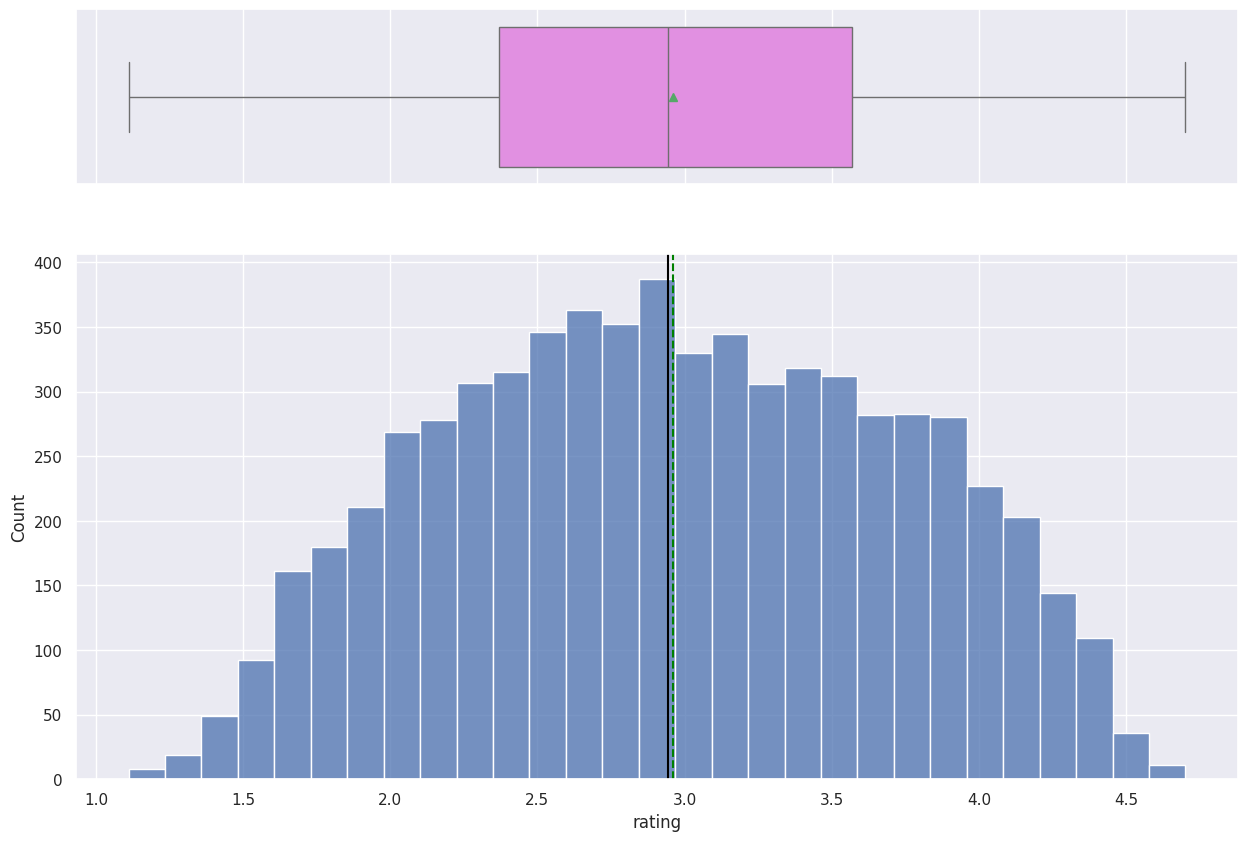

In [66]:
histogram_boxplot(df, "rating")

* The anime ratings are kind of normally distributed with much fatter tails.

#### `eps`

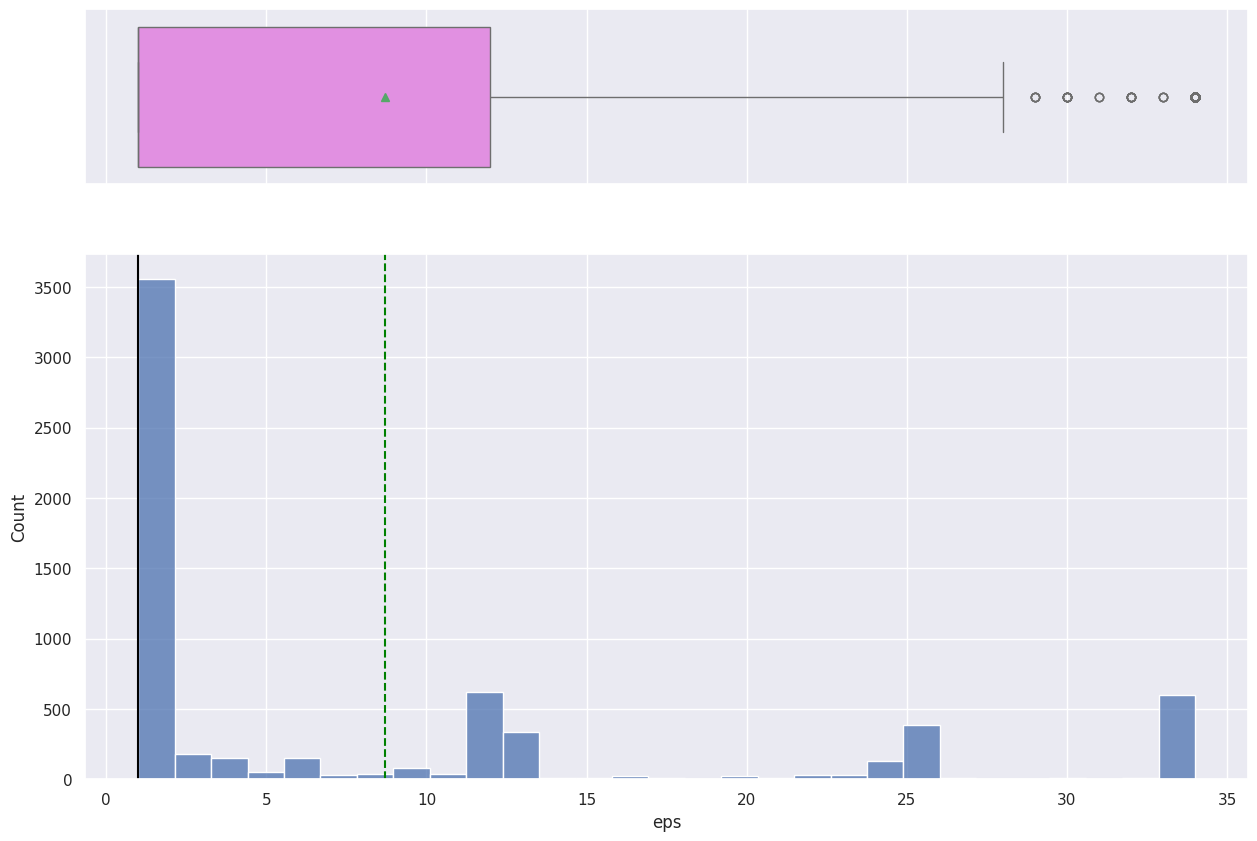

In [67]:
histogram_boxplot(df, "eps")

* The distribution is right-skewed, as there are many anime movies in the data and they are considered to be of only one episode (as per data description)

#### `duration`

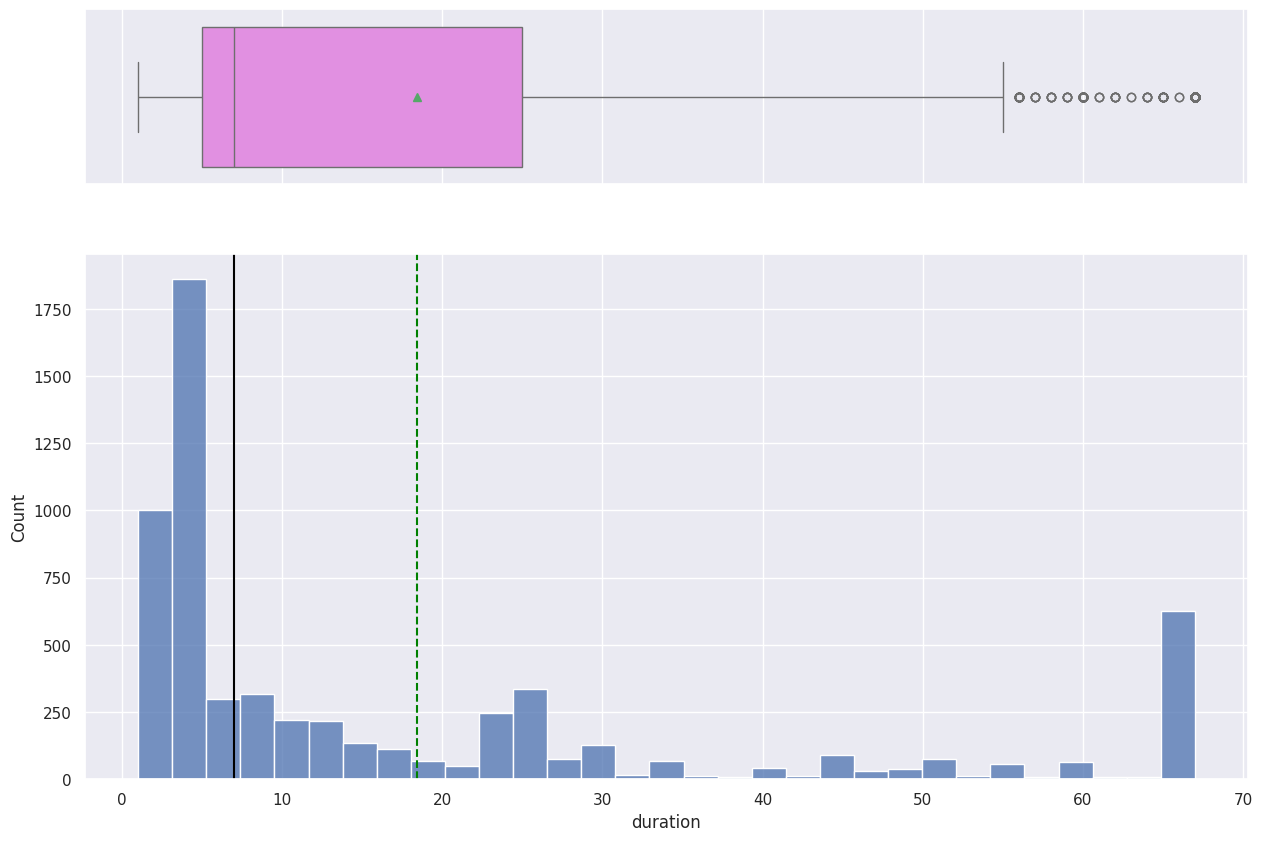

In [68]:
histogram_boxplot(df, "duration")

* The distribution is right-skewed with a median runtime of less than 10 minutes.

#### `watched`

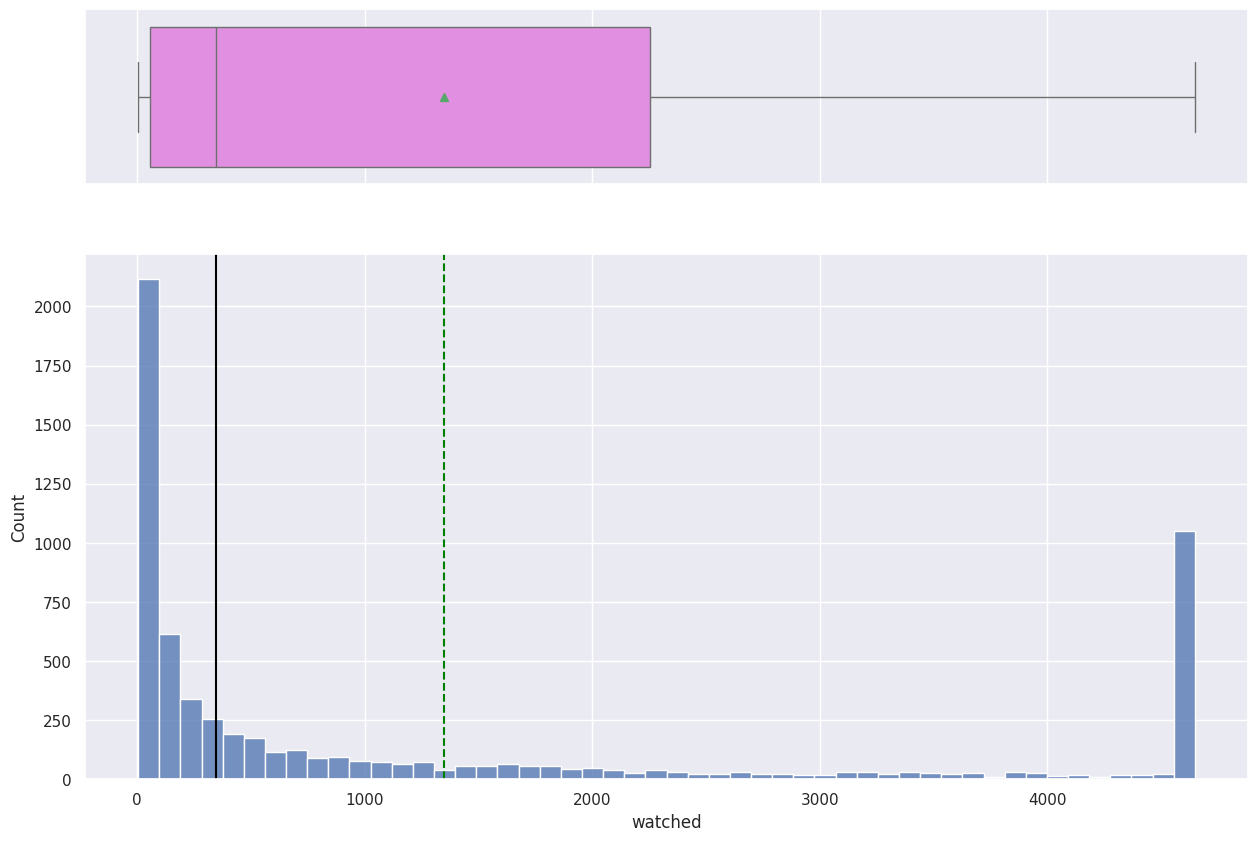

In [69]:
histogram_boxplot(df, "watched", bins=50)

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

#### `watching`

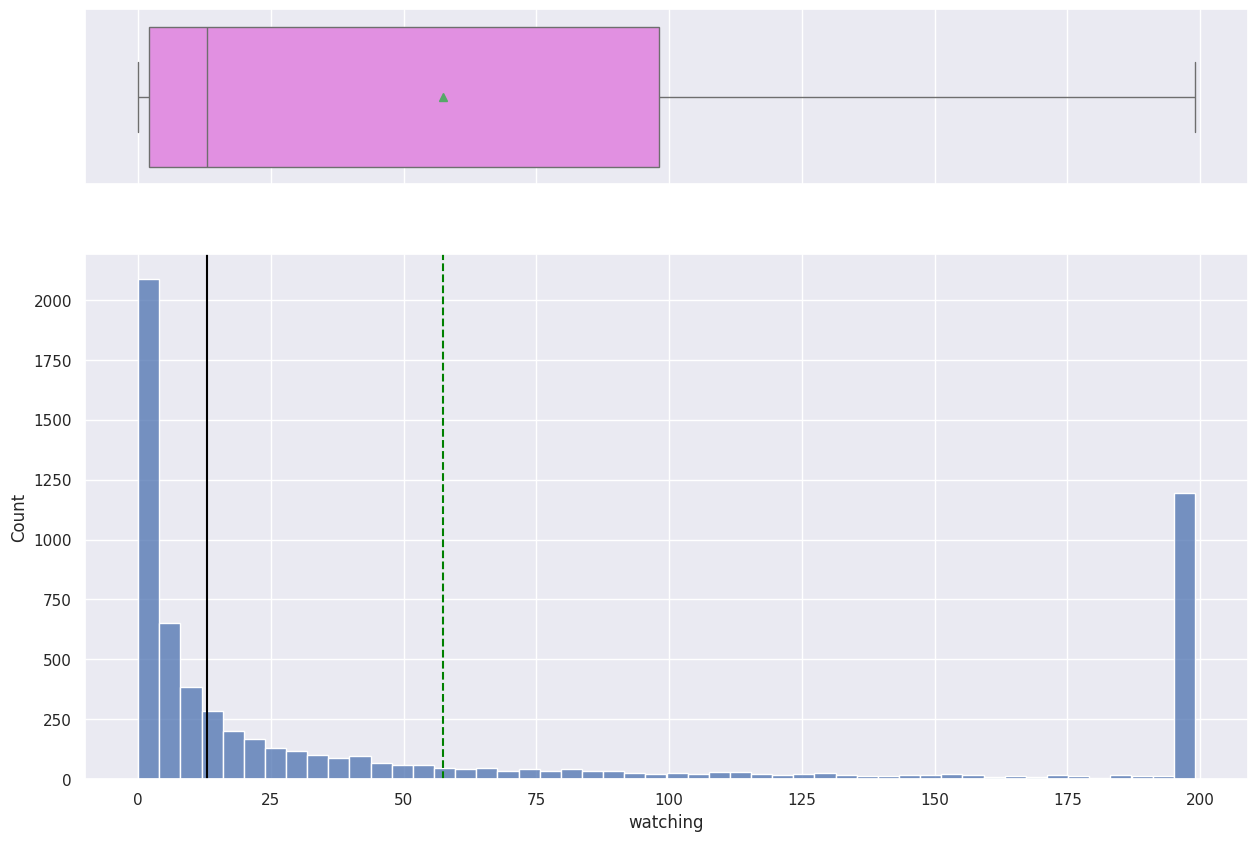

In [70]:
histogram_boxplot(df, "watching", bins=50)

* The distribution is heavily right-skewed.

#### `votes`

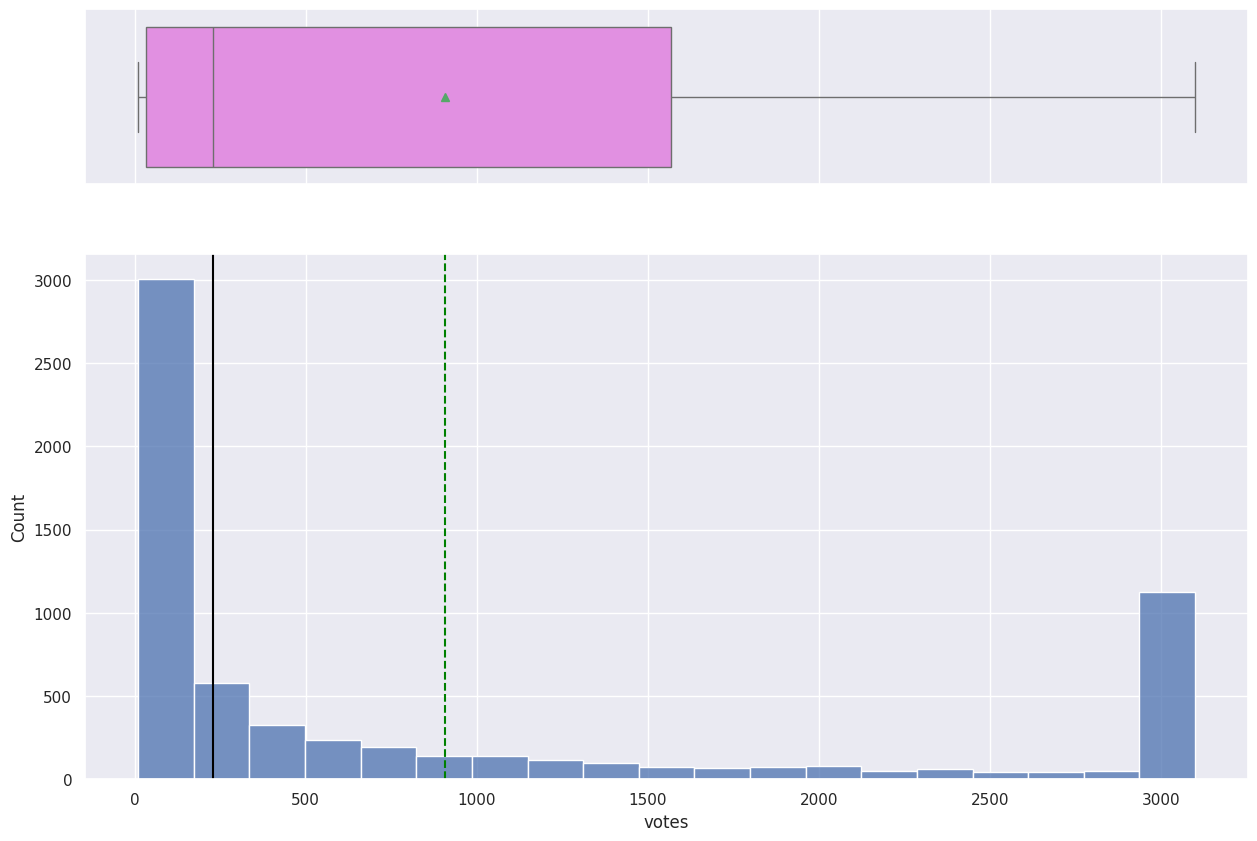

In [71]:
histogram_boxplot(df, "votes")

* The distribution is heavily right-skewed and seems to be bimodal, with most anime having less than 250 or more 2500 votes

#### `startYr`

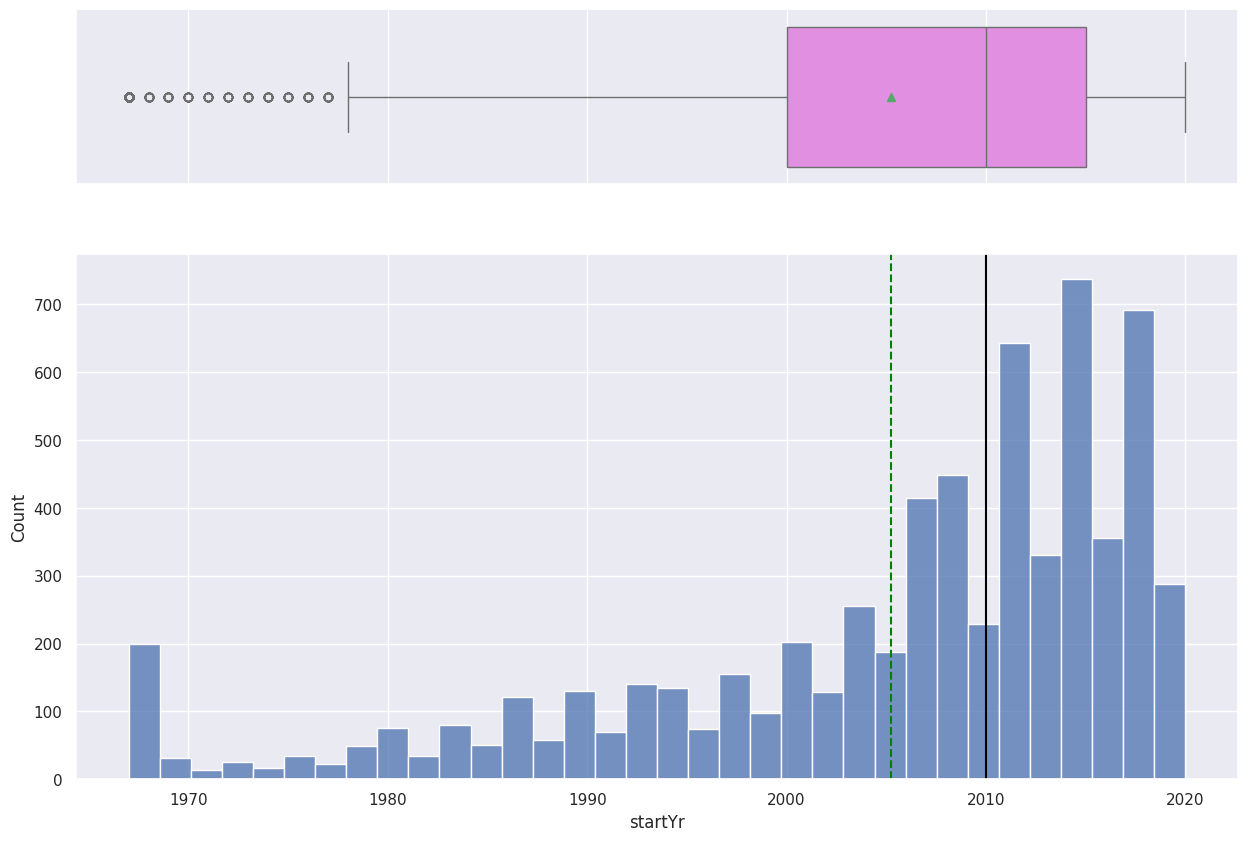

In [72]:
histogram_boxplot(df, "startYr")

* The distribution is left-skewed and most of the anime have started after 2005

#### `finishYr`

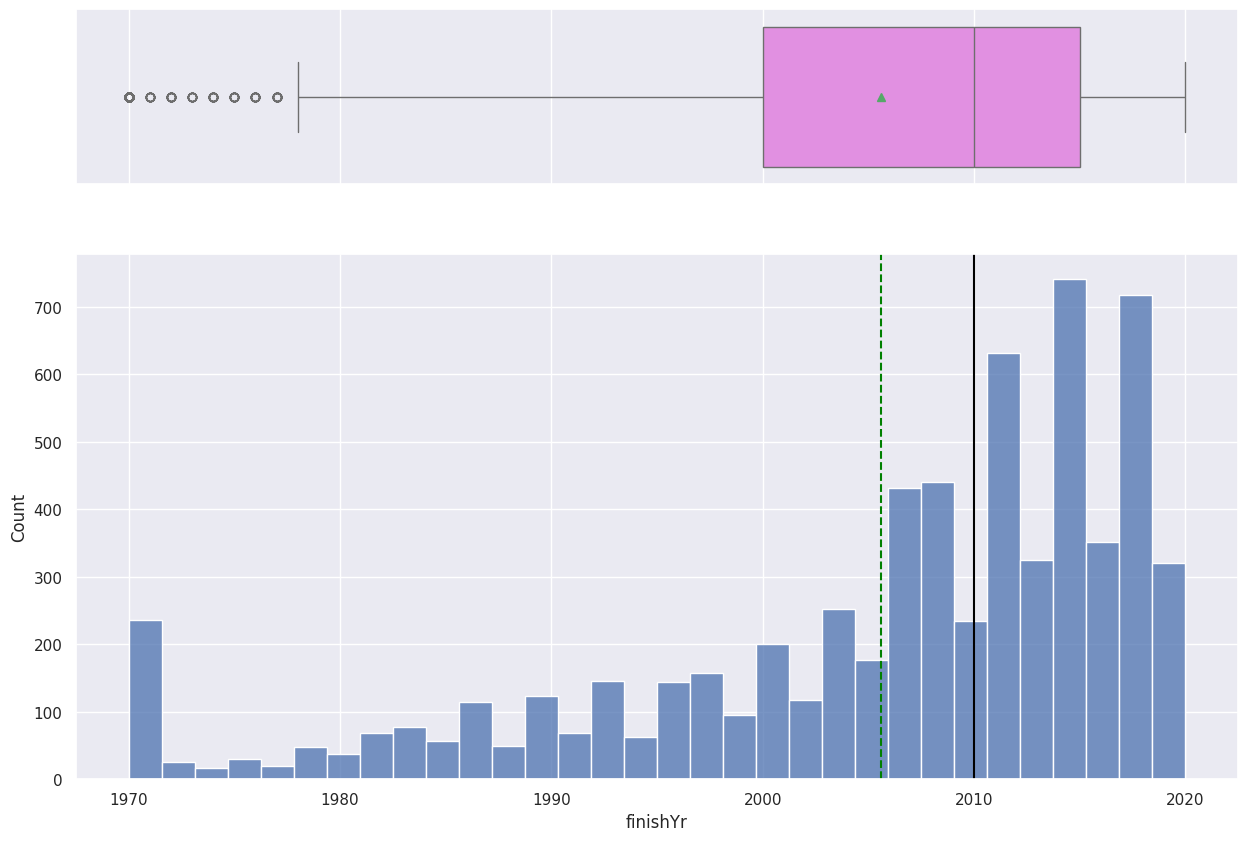

In [73]:
histogram_boxplot(df, "finishYr")

* The distribution is left-skewed and most of the anime have finished after 2005

#### `mediaType`

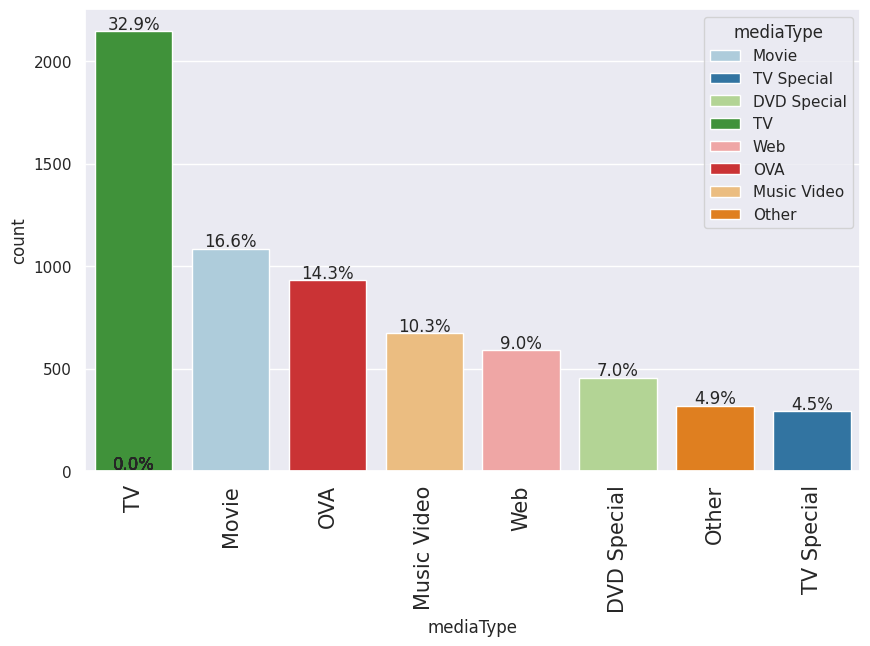

In [74]:
labeled_barplot(df, "mediaType", perc=True)

* Most of the anime are released for TV

#### `studio_primary`

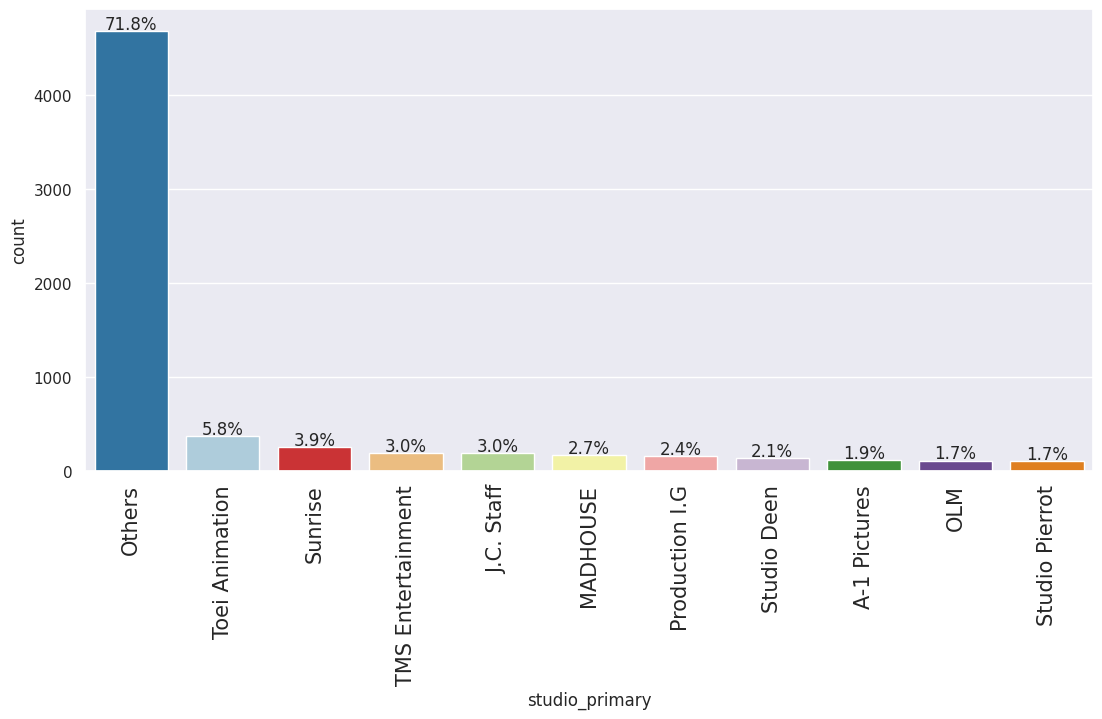

In [75]:
labeled_barplot(df, "studio_primary", perc=True)

* *Toei Animation* is the most common studio among the available studio names

#### `studios_colab`

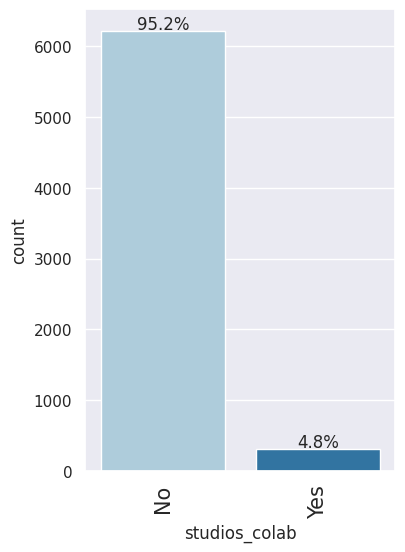

In [76]:
labeled_barplot(df, "studios_colab", perc=True)

- More than 95% of the anime in the data do not involve a collaboration between studios

#### `contentWarn`

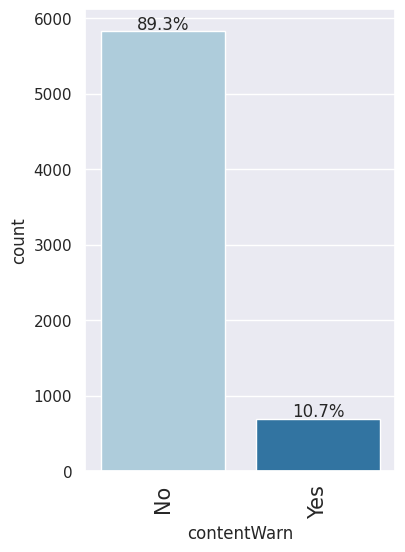

In [77]:
labeled_barplot(df, "contentWarn", perc=True)

- Nearly 90% of the anime in the data do not have an associated content warning.

### Bivariate analysis

#### Correlation Check

In [78]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping start and finish year from list of numerical columns as they are not numerical in nature
num_cols.remove("startYr")
num_cols.remove("finishYr")

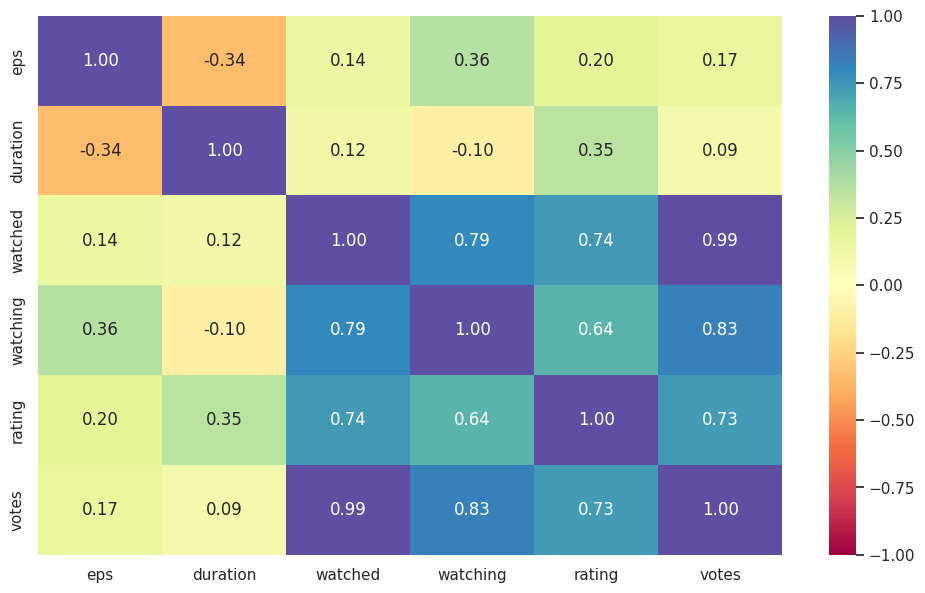

In [79]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The rating of an anime is highly correlated with the number of people who have watched the anime and voted for it on the portal
* The number of people who have watched the anime is highly correlated with the number of people who are watching the anime
* The number of people who have watched the anime is very highly correlated with the number of people who have voted for the anime on the portal

#### Let's check the variation in the anime ratings with some of the categorical columns in the data.

#### `genre` vs `rating`

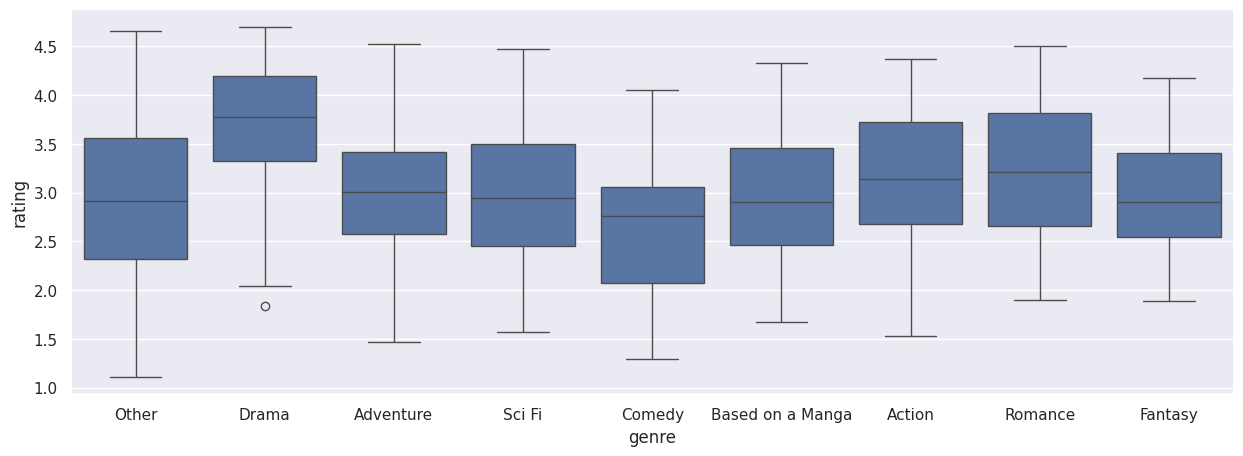

In [80]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="rating")
plt.show()

* Anime under the genre of Drama are rated the highest in general, while those under the genre of Comedy and rated the least

#### `genre` vs `watched`

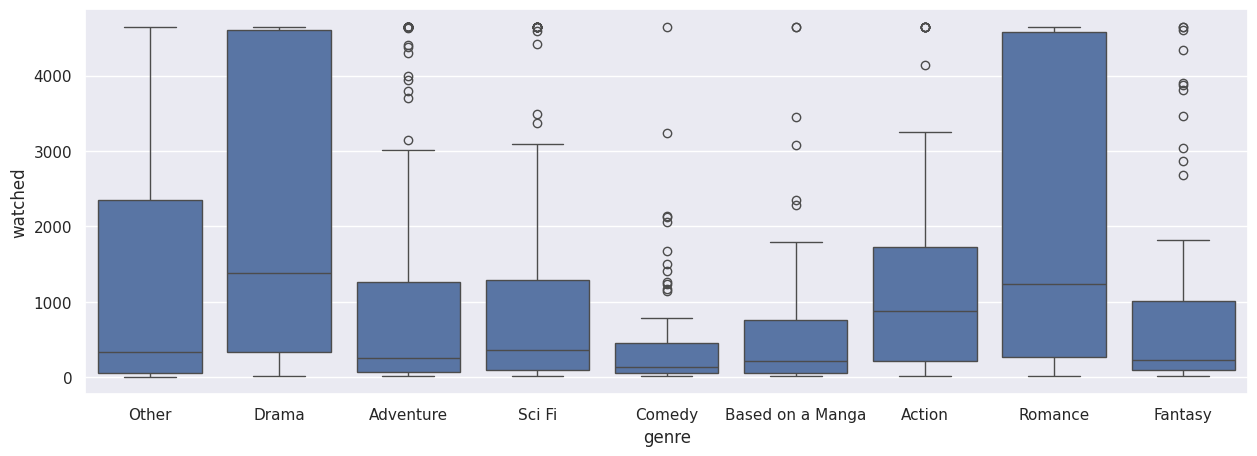

In [81]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="genre", y="watched")
plt.show()

* Anime under the genres of Drama and Romance have higher viewership in general

#### `mediaType` vs `rating`

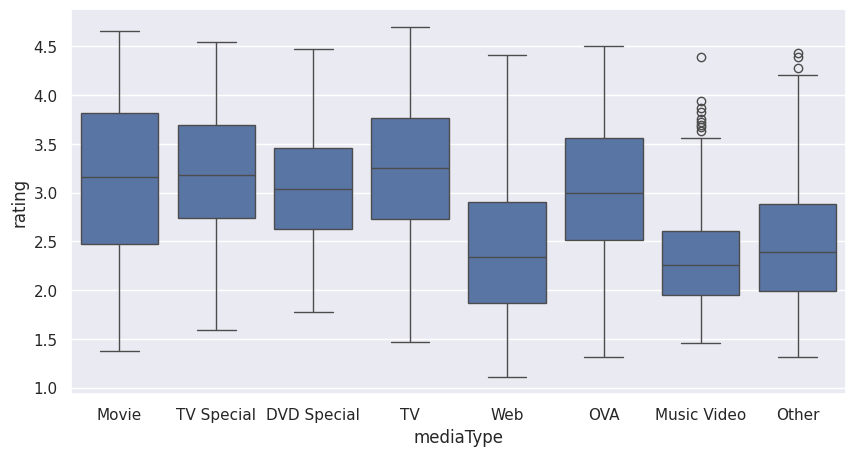

In [82]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="rating")
plt.show()

* Anime available as web series or music videos have a lower rating in general

#### `mediaType` vs `watched`

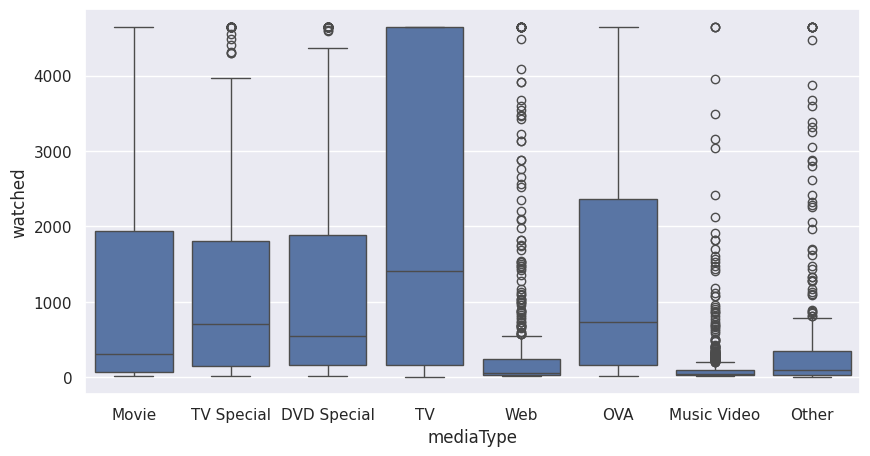

In [83]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="watched")
plt.show()

* Anime released as web series and music videos have lower viewership in general

#### `studio_primary` vs `rating`

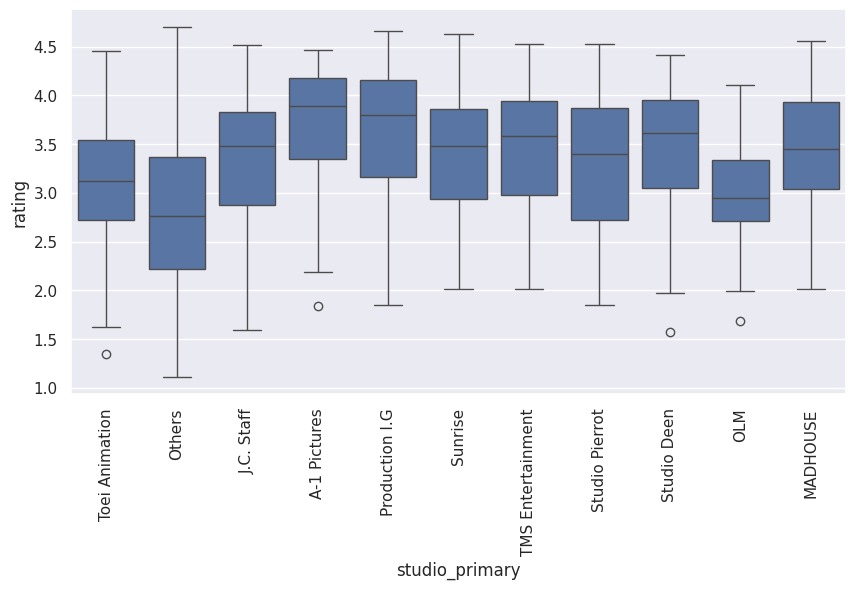

In [84]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="studio_primary", y="rating")
plt.xticks(rotation=90)
plt.show()

* The ratings are low for anime created by *OLM* studios in general
* Ratings are also low, in general, for anime created by studios other than the ones in the data

#### `mediaType` vs `duration`

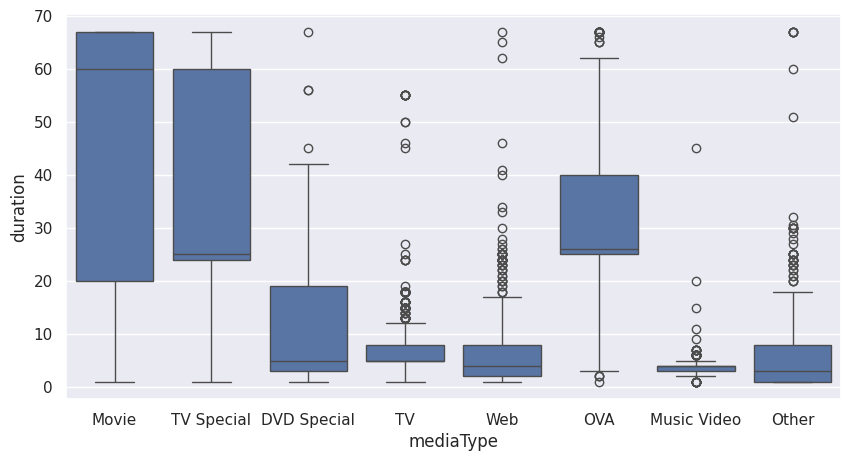

In [85]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="duration")
plt.show()

* Anime movies have the highest duration while music videos have the lowest, which is expected

#### `mediaType` vs `eps`

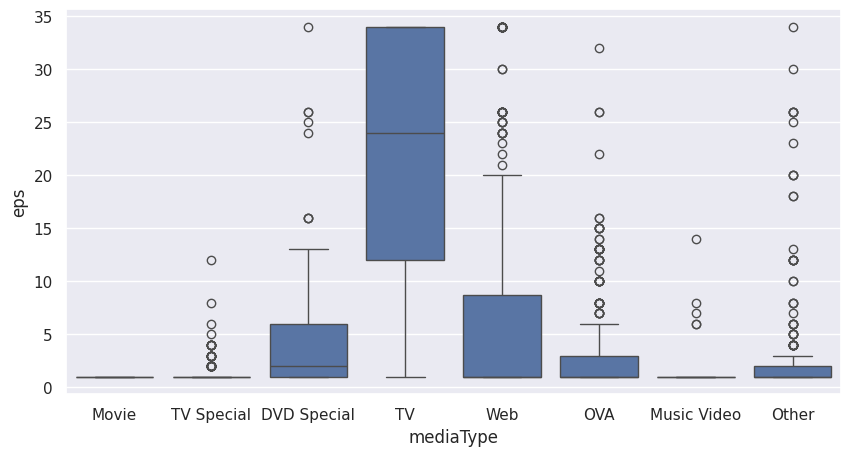

In [86]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="mediaType", y="eps")
plt.show()

* Anime movies have seem to have exactly one episode, which is in line with the data description
* Anime released for TV have the highest number of episodes (more than 20) in general

In [87]:
df[df.mediaType == "Movie"]["eps"].describe()

count    1085.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: eps, dtype: float64

* This confirms that anime movies have exactly one episode

#### `genre` vs `watched`

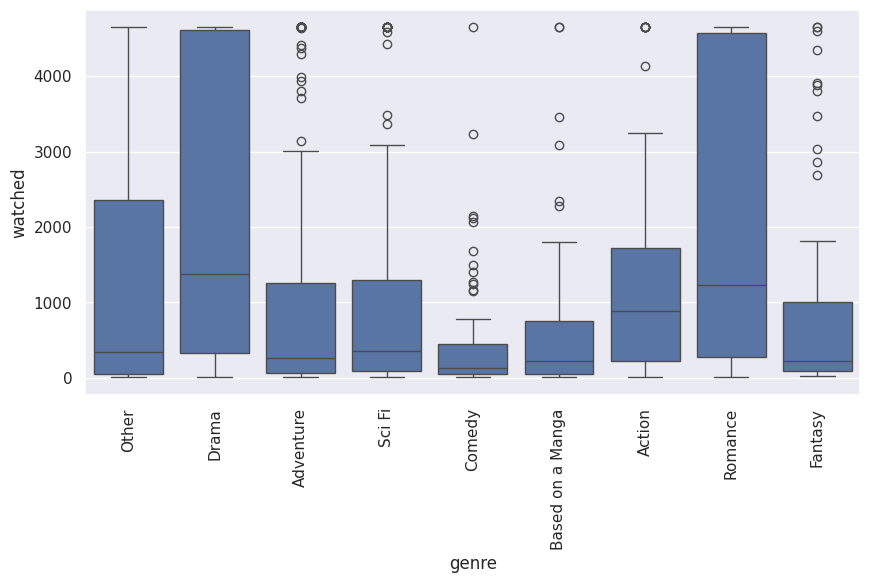

In [88]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="watched")
plt.xticks(rotation=90)
plt.show()

* Anime from the Drama and Comedy genres have been watched more in general

#### `genre` vs `watching`

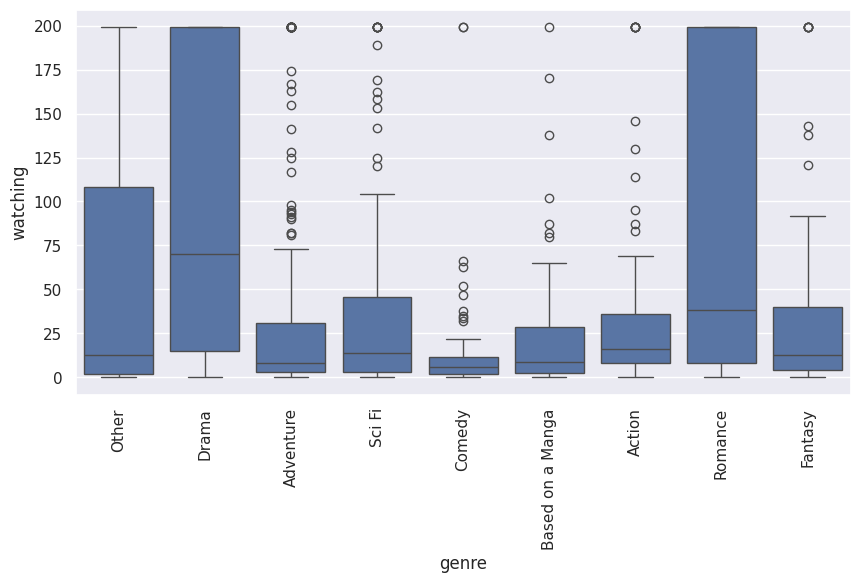

In [89]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="watching")
plt.xticks(rotation=90)
plt.show()

* Anime from the Drama and Comedy genres are being watched more in general

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

___